In [2]:
%load_ext ipycache
%matplotlib inline

In this first step towards our map, we acquire data from OpenStreetMap for Singapore, filter and clean it using GeoPandas and the fuzzywuzzy library.

Recipes contained in this notebook:
* Obtaining geographic data from OpenStreetMap
  * Through Metro Extracts
  * Through the library `geopandas_osm`
* Using GeoPandas
  * Plotting
  * Geographic manipulation
  * Basic data manipulation via Pandas
    * filtering
    * string and regex replacement
* Using `fuzzywuzzy` to clean data

# Obtaining geographic data from OpenStreetMap

## Method 1: Download from Metro Extracts

[Metro Extracts](https://mapzen.com/metro-extracts/) is a service by MapZen that packages up OSM data from key cities around the world for convenient download, updated weekly.

In [5]:
# Download the Singapore IMPOSM GeoJSON zipfile

!wget https://s3.amazonaws.com/metro-extracts.mapzen.com/singapore.imposm-geojson.zip

--2015-03-20 22:15:01--  https://s3.amazonaws.com/metro-extracts.mapzen.com/singapore.imposm-geojson.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.10.80
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.10.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17780196 (17M) [binary/octet-stream]
Saving to: ‘singapore.imposm-geojson.zip’

100%[======================================>] 17,780,196   306KB/s   in 71s    

2015-03-20 22:16:12 (243 KB/s) - ‘singapore.imposm-geojson.zip’ saved [17780196/17780196]



In [6]:
# Unzip the file

!unzip singapore.imposm-geojson.zip

Archive:  singapore.imposm-geojson.zip
  inflating: singapore-admin.geojson  
  inflating: singapore-aeroways.geojson  
  inflating: singapore-amenities.geojson  
  inflating: singapore-buildings.geojson  
  inflating: singapore-landusages.geojson  
  inflating: singapore-landusages_gen0.geojson  
  inflating: singapore-landusages_gen1.geojson  
  inflating: singapore-places.geojson  
  inflating: singapore-roads.geojson  
  inflating: singapore-roads_gen0.geojson  
  inflating: singapore-roads_gen1.geojson  
  inflating: singapore-transport_areas.geojson  
  inflating: singapore-transport_points.geojson  
  inflating: singapore-waterareas.geojson  
  inflating: singapore-waterareas_gen0.geojson  
  inflating: singapore-waterareas_gen1.geojson  
  inflating: singapore-waterways.geojson  


The relevant files for us are `singapore-roads.geojson` and `singapore-admin.geojson`, which gives us administrative boundaries.

We know we'll have to do some filtering with `singapore-roads.geojson`, so let's open it up in Pandas...

In [3]:
import pandas as pd

In [14]:
df = pd.read_json('singapore-roads.geojson')

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

Aw, shucks...Pandas can't open GeoJSON files. # TODO: why

Luckily, GeoPandas comes to the rescue!

GeoPandas is an extension of Pandas that adds geographic capabilities. We'll see in a bit some of the awesome geographic manipulation we can do. But for now, it's sort of a relief that we can open GeoJSON files!

In [4]:
import geopandas as gpd

In [15]:
df = gpd.read_file("singapore-roads.geojson")

In [16]:
df

,access,bridge,class,geometry,id,name,oneway,osm_id,ref,service,tunnel,type,z_order
0,None,0,highway,"LINESTRING (103.8284047430461 1.3068665711867,...",0,Orchard Road,1,4386520,None,None,0,primary,6
1,None,0,highway,LINESTRING (103.8433569686602 1.28958115900517...,1,Merchant Loop,1,9590308,None,None,0,residential,3
2,None,0,highway,LINESTRING (103.8412715511506 1.28860734949448...,2,Clemenceau Avenue,1,9590470,None,None,0,primary,6
3,None,0,highway,LINESTRING (103.8420525768883 1.29002322057853...,3,Merchant Road,1,9590561,None,None,0,secondary,5
4,None,0,highway,LINESTRING (103.8447162618978 1.28850685047542...,4,Read Cresent,1,9590577,None,None,0,residential,3
5,None,0,highway,LINESTRING (103.8513752648741 1.39678611968956...,5,Tampines Expressway,1,14058412,TPE,None,0,motorway,9
6,None,0,highway,LINESTRING (103.8579654524252 1.39413458843965...,6,Seletar Expressway,1,14061945,SLE,None,0,motorway,9
7,None,0,highway,LINESTRING (103.8443906249596 1.31096833932369...,7,Central Expressway,1,14295878,CTE,None,0,motorway,9
8,None,1,highway,LINESTRING (103.8664486928081 1.29436714189819...,8,ECP Rochor Road Exit,1,14458223,None,None,0,motorway_link,23
9,None,0,highway,LINESTRING (103.8021676259133 1.27279203931056...,9,Telok Blangah Road,1,14458224,None,None,0,primary,6


###Yay!

What's more, we can do geo stuff really easily like plotting the contents of this GeoDataFrame.

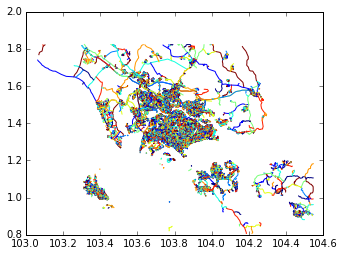

In [7]:
df.plot()

Well that was easy! But plotting this has shown us that there's too much data in here. Not only is Singapore (the dense diamond-shaped island) included in this set, there's also roads from Malaysia to the north and Indonesia to the south in here. We'll have to filter them out. To do that we'll need the data in the `singapore-admin.geojson` file.

In [17]:
admin = gpd.read_file('singapore-admin.geojson')
admin

,admin_leve,geometry,id,name,osm_id,type
0,2,"POLYGON ((103.5682607272107 1.276999922341711,...",0,Singapura,-536780,administrative
1,6,"POLYGON ((103.75383539292 1.394411191244401, 1...",1,North West Community Development Council,-3831714,administrative
2,6,"POLYGON ((103.5682607272107 1.276999922341711,...",2,South West Community Development Council,-3831716,administrative
3,6,"POLYGON ((103.8567891361339 1.355489991496248,...",3,South East Community Development Council,-3831715,administrative
4,6,"POLYGON ((103.8733000604621 1.362206494328233,...",4,North East Community Development Council,-3831713,administrative
5,6,"POLYGON ((103.7926486337553 1.299063941341472,...",5,Central Singapore Community Development Council,-3831712,administrative
6,10,"POLYGON ((103.6607330681441 1.548248032044329,...",6,Taman Impian Emas,232080984,administrative
7,NaN,"POLYGON ((103.915249893284 1.385568199577297, ...",7,Pasir Ris,244243731,administrative
8,NaN,"POLYGON ((103.9200380554719 1.374212145700731,...",8,Tampines,244243399,administrative


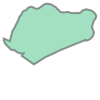

In [18]:
# The first one is what we want

sg_boundary = admin.ix[0].geometry
sg_boundary

We filter to the roads that lie `within` this Singapore boundary. The `within` function is from the `shapely` geographic manipulation library, whose capabilities are exposed in an intuitive way by `geopandas`.

In [19]:
sg_roads = df[df.geometry.within(sg_boundary)]

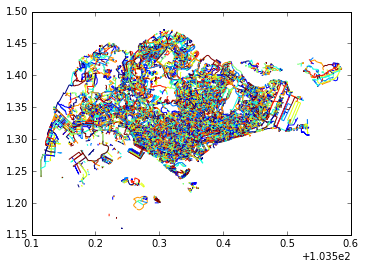

In [20]:
sg_roads.plot()

That looks a lot more like it! We can also take a look at the relative sizes of the dataframes:

In [21]:
print df.shape
sg_roads.shape

(62545, 13)


(29451, 13)

We can also do standard `pandas` style filtering. For example, we can extract just the "highways" - meaning roads - from this dataframe with the following line of code.

In [22]:
sg_roads = sg_roads[sg_roads["class"] == 'highway']
sg_roads.shape

(28810, 13)

We'll do a bit more filtering on the output presently, but first let's look at the second way of obtaining OSM data, which will bring us to the same point with very little code.

## Method 2: Query OSM directly via `geopandas_osm`

This second method uses a library called `geopandas_osm`, written by Jake Wasserman. It will eventually be incorporated into `geopandas.io`, but for now we use it as a stand-alone library. You can find the code [here](https://github.com/jwass/geopandas_osm). It queries OpenStreetMap directly through their Overpass API.

It's more convenient as we don't need to download and unpack the data from Metro Extracts every time. Also, the Overpass API is updated roughly once a day, so if you find yourself making edits to OpenStreetMap directly that you want to see reflected in the data you download, it's a much shorter wait. Note, however, that the API does take quite some time to return results!

In [23]:
%%cache sgosm.pkl df2 sg_roads2

import geopandas_osm.osm

# Query for the highways within the `sg_boundary` we obtained earlier from the sg_admin.
df2 = geopandas_osm.osm.query_osm('way', sg_boundary, recurse='down', tags='highway')

# This gives us lots of columns we don't need, so we'll isolate it to the three we do need
sg_roads2 = df2[df2.type == 'LineString'][['highway', 'name', 'geometry']]

# display the GeoDataFrame that results
sg_roads2

,highway,name,geometry
0,primary,Orchard Road,"LINESTRING (103.8284048 1.3068666, 103.8287382..."
1,residential,Hougang Ave 1,"LINESTRING (103.8858462 1.3517778, 103.8859356..."
2,primary,Scotts Road,"LINESTRING (103.8387571 1.3126764, 103.83872 1..."
3,tertiary,Keng Lee Road,"LINESTRING (103.8395387 1.3132203, 103.8396493..."
4,footway,NaN,"LINESTRING (103.8408084 1.3146751, 103.8412438..."
5,primary,Newton Road,"LINESTRING (103.8392505 1.3134495, 103.8394598..."
6,residential,Sarkies Road,"LINESTRING (103.8373031 1.3147037, 103.8359738..."
7,primary,Patterson Road,"LINESTRING (103.8318305 1.3050277, 103.8315539..."
8,secondary,Orchard Boulevard,"LINESTRING (103.8348293 1.3004045, 103.8342528..."
9,secondary,Grange Road,"LINESTRING (103.8348293 1.3004045, 103.8346883..."


[Saved variables df2, sg_roads2 to file '/home/michelle/Dropbox/Repositories/public-facing/SingaporeRoadnameOrigins/notebooks/sgosm.pkl'.]


There's a slight discrepancy in the number of roads, which could be due to changes in the OpenStreetMap database since the Metro Extract was extracted. In any case, we've arrived at roughly the same point. Let's carry on with the cleaning, with this GeoDataFrame.

## More cleaning

Since we're doing name classification of roads, we can drop the roads with no names in the database.

In [24]:
named_roads = sg_roads2[sg_roads2.name.notnull()]
named_roads.shape

(11999, 3)

That cut down on a lot of roads! Let's also make sure that we're doing actual roads, not footpaths and the like:

In [25]:
named_roads.highway.value_counts()

residential       4716
primary           2571
secondary         1259
motorway           585
tertiary           571
unclassified       564
service            495
footway            225
cycleway           221
motorway_link      217
trunk              205
primary_link       104
pedestrian          55
track               37
construction        34
trunk_link          34
path                34
steps               27
secondary_link      19
proposed             8
tertiary_link        8
raceway              7
living_street        2
rest_area            1
dtype: int64

In [5]:
%%cache filtered_roads.pkl filtered_roads

accepted_road_types = [u'motorway', u'primary', 
                       u'primary_link', u'residential', u'road',
                       u'secondary', u'secondary_link', u'tertiary', 
                       u'tertiary_link', u'trunk', u'trunk_link', u'unclassified']

filtered_roads = named_roads[named_roads.highway.isin(accepted_road_types)]
filtered_roads.shape

[Skipped the cell's code and loaded variables filtered_roads from file '/home/michelle/Dropbox/Repositories/public-facing/SingaporeRoadnameOrigins/notebooks/filtered_roads.pkl'.]


In [6]:
filtered_roads

,highway,name,geometry
0,primary,Orchard Road,"LINESTRING (103.8284048 1.3068666, 103.8287382..."
1,residential,Hougang Ave 1,"LINESTRING (103.8858462 1.3517778, 103.8859356..."
2,primary,Scotts Road,"LINESTRING (103.8387571 1.3126764, 103.83872 1..."
3,tertiary,Keng Lee Road,"LINESTRING (103.8395387 1.3132203, 103.8396493..."
5,primary,Newton Road,"LINESTRING (103.8392505 1.3134495, 103.8394598..."
6,residential,Sarkies Road,"LINESTRING (103.8373031 1.3147037, 103.8359738..."
7,primary,Patterson Road,"LINESTRING (103.8318305 1.3050277, 103.8315539..."
8,secondary,Orchard Boulevard,"LINESTRING (103.8348293 1.3004045, 103.8342528..."
9,secondary,Grange Road,"LINESTRING (103.8348293 1.3004045, 103.8346883..."
10,primary,Paterson Hill,"LINESTRING (103.830813 1.3039006, 103.8302888 ..."


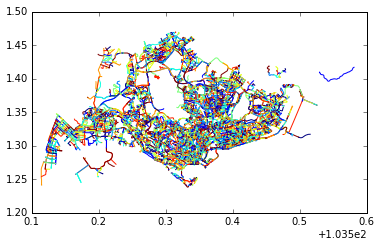

In [39]:
filtered_roads.plot()

In case you're wondering, the empty spots are mostly reservoirs, followed by military areas and air fields. So this is looking pretty right.

Now we'll check whether the road names are correct. Since OpenStreetMap is crowdsourced, it's possible that there are typos. Also, often they use abbreviations for the streets - but only sometimes. For our own sanity, we'll expand out all the abbreviations to their full length.

In [18]:
abbrev  = ['Ave', 'Dr', 'St', 'Blvd', 'Ter', 'Pl', 'Gr']
nonabbr = ['Avenue', 'Drive', 'Street', 'Boulevard', 'Terrace', 'Place', 'Grove']

for a, b in zip(abbrev, nonabbr):
    filtered_roads.replace('(.)' + a + '(\.|$)', r'\1' + b,  regex=True, inplace=True)
    filtered_roads.replace('(.)' + a + ' ', r'\1' + b + r' ', regex=True, inplace=True)

abbrev  = ['Lor', 'Jln', 'Kpg', 'Bkt']
nonabbr = ['Lorong', 'Jalan', 'Kampong', 'Bukit']

for a, b in zip(abbrev, nonabbr):
    filtered_roads.replace("^%s\.?\s" % a, b + ' ', regex=True, inplace=True)
    filtered_roads.replace(" %s\.?\s" % a, ' ' + b + ' ', regex=True, inplace=True)

froads = filtered_roads.copy(deep=True)
froads.shape

(10636, 3)

In [19]:
# quick filter because I realised that there's some carpark entrances and exits in there
# also remove flyovers
# ~ here is a negative: filter to just the roads that do not contain "exit", etc
froads = froads[~froads['name'].str.contains("exit", case=False)]
froads = froads[~froads['name'].str.contains("entrance", case=False)]
froads = froads[~froads['name'].str.contains("flyover", case=False)]
froads = froads[~froads['name'].str.contains("fyover", case=False)] # a typo
froads = froads[~froads['name'].str.contains("underpass", case=False)]
froads = froads[~froads['name'].str.contains("access", case=False)]
# remove a handful of "roads" that look like junctions between roads
froads = froads[~froads['name'].str.contains(";")]

froads.shape

(10490, 3)

I'm going to compare them with a correctly-spelled list of roads I got off another website.

In [20]:
correct_roads = pd.read_csv("sg_roadnames.txt",skiprows=2, header=None)
correct_roads.columns = ["Roadname"]
correct_roads

,Roadname
0,Abingdon Road
1,Adam Drive
2,Adam Park
3,Adam Road
4,Adis Road
5,Admiralty Drive
6,Admiralty Lane
7,Admiralty Link
8,Admiralty Road
9,Admiralty Road East


In [21]:
correct_roads.shape

(3946, 1)

So there are 3911 roads in the list of correct roads. How many in the list of filtered roads? Roads can share names, so we need to count unique values.

In [23]:
len(froads['name'].value_counts())

3434

It looks like we have an approximate subset, so it makes sense to try matching the roads in OSM with the roads from our "correct" set. We can use the `fuzzywuzzy` library from SeatGeek to do this.

In [12]:
from fuzzywuzzy import process

In [13]:
# To give us an idea of how this library works...note the transposition of the i and e

print process.extractOne("Aljuneid Avenue 1", correct_roads.Roadname.values)

('Aljunied Avenue 1', 94)


Now we do it on all the unique roadname values.

In [16]:
roadname_values = pd.DataFrame(pd.unique(froads.name))
roadname_values.columns = ["name"]

In [161]:
%%cache augmentedosm.pkl augmented_roads

import re

# We'll augment our dataframe with the best guess output by fuzzywuzzy and its associated score

augmented_roads = roadname_values.copy(deep=True)

def correct_road(rd):
    # if there's an exact match, return it (note: fuzzywuzzy may already do this instead
    # of searching through everything for the top match, but I don't know for sure)
    if rd in correct_roads.Roadname.values:
        return rd, 100
    else:
        # use fuzzywuzzy to find the closest match
        closest_match, score = process.extractOne(rd, correct_roads.Roadname.values)
        # only use the closest match if there's the same number of words
        rd_words = rd.split()
        closest_match_words = closest_match.split()
        if len(closest_match_words) == len(rd_words):
            # in addition, if the only difference is in the number, then just return
            # the old number
            if ((closest_match_words[:-1] == rd_words[:-1]) and 
                (re.search("\d", closest_match_words[-1]))   and
                (re.search("\d", rd_words[-1]))):
                return rd, 100
            else:
                return closest_match, score
        else:
            return rd, 100

augmented_roads["corrected"], augmented_roads["score"] = zip(*augmented_roads.name.apply(correct_road))

augmented_roads

[Skipped the cell's code and loaded variables augmented_roads from file '/home/michelle/Dropbox/Repositories/public-facing/SingaporeRoadnameOrigins/notebooks/augmentedosm.pkl'.]


Some of these are obviously wrong. Let's inspect the ones that did get changed more closely.

In [162]:
augmented_roads[(augmented_roads.score >= 90) & (augmented_roads.score < 100)]

,name,corrected,score
6,Patterson Road,Paterson Road,96
18,Read Cresent,Read Crescent,96
91,Tomlison Road,Tomlinson Road,96
101,Chua Chu Kang Road,Choa Chu Kang Road,94
255,Mounbatten Road,Mountbatten Road,97
326,Choa Chu Kang Cresent,Choa Chu Kang Crescent,98
344,Sungei Kadut Cresent,Sungei Kadut Crescent,98
382,Neo Tiew Cresent,Neo Tiew Crescent,97
398,Woodland Centre Road,Woodlands Centre Road,98
410,Woodlands North Drive,North Woodlands Drive,95


While the ones with a score under 90 are mostly wrong, and it would be more worth it to just use the original names supplied by OSM.

In [163]:
augmented_roads[(augmented_roads.score < 90)]

,name,corrected,score
15,Merchant Loop,Merchant Road,77
20,Seletar Expressway,Seletar Road,85
21,Central Expressway,Central Circus,63
25,Kranji Expressway,Kranji Loop,85
45,Serangoon Viaduct,Serangoon Road,77
103,Elgin Bridge,Jalan Woodbridge,64
106,Esplanade Drive,Adam Drive,85
197,Buangkok Drive,Gul Drive,85
202,Compassvale Bow,Compassvale Road,84
204,Sengkang Square,Geylang Square,76


In [164]:
final_roadnames = augmented_roads.copy(deep=True)
final_roadnames["final_name"] = final_roadnames.apply(lambda row: row["corrected"] if row.score >= 90 else row["name"], axis=1)
final_roadnames

,name,corrected,score,final_name
0,Orchard Road,Orchard Road,100,Orchard Road
1,Hougang Avenue 1,Hougang Avenue 1,100,Hougang Avenue 1
2,Scotts Road,Scotts Road,100,Scotts Road
3,Keng Lee Road,Keng Lee Road,100,Keng Lee Road
4,Newton Road,Newton Road,100,Newton Road
5,Sarkies Road,Sarkies Road,100,Sarkies Road
6,Patterson Road,Paterson Road,96,Paterson Road
7,Orchard Boulevard,Orchard Boulevard,100,Orchard Boulevard
8,Grange Road,Grange Road,100,Grange Road
9,Paterson Hill,Paterson Hill,100,Paterson Hill


In [165]:
# Final clean-up

final_roadnames.loc[3432, 'final_name'] = 'Pan-Island Expressway' # was: PIE
final_roadnames.loc[2492, 'final_name'] = 'Woodlands Drive 75' # was: Woodlands Drive 50

In [166]:
# drop the intermediate columns in final_roadnames and write out to csv file
final_roadnames.drop(["score", "corrected"], inplace=True, axis=1)
final_roadnames.to_csv("singapore-roadnames-final.csv")

In [31]:
# write out our filtered roads GeoDataFrame to a GeoJSON file
filtered_roads.crs = None
filtered_roads.to_file("singapore-roads-filtered.geojson", driver="GeoJSON")